Healthcare is one of the most critical sectors in the economy, and understanding the factors 
that drive 
insurance costs is essential for both insurers and patients.

This dataset provides a granular look at the personal health data of 1,338 individuals in 
the United States. It reveals how factors like age, BMI, smoking habits, and family size 
influence the final medical bills charged by health insurance companies.

### Importing the relevant libraries

In [109]:
# import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from sklearn.linear_model import LinearRegression

sns.set_theme()


# Download latest version
# path = kagglehub.dataset_download("hetmengar/medical-insurance-cost-prediction")
# print("Path to dataset files:", path)

### Loading the data

In [110]:
raw_data = pd.read_csv('medical-charges.csv')


#data.shape

### Copying the data into a new variable

In [111]:
data = raw_data.copy()
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Dealing with dummy variables

sex, smoker, region

In [112]:
data['sex'].unique()


array(['female', 'male'], dtype=object)

In [113]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [114]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Mapping the data 

In [115]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({})

In [116]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,NaN,16884.92400
1,18,1,33.770,1,0,NaN,1725.55230
2,28,1,33.000,3,0,NaN,4449.46200
3,33,1,22.705,0,0,NaN,21984.47061
4,32,1,28.880,0,0,NaN,3866.85520


In [117]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,0.0,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,NaN,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,NaN,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,NaN,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,NaN,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,NaN,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,NaN,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,NaN,63770.428010


### Creating the regression

Declaring the dependent and independent variables

In [118]:
y = data['charges']
x = data[['age', 'sex', 'bmi', 'children', 'smoker']]



### Regression

In [119]:
reg = LinearRegression()

In [120]:
reg.fit(x, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [121]:
reg.intercept_.round(3)

np.float64(-12052.462)

In [122]:
reg.coef_.round(3)

array([  257.735,  -128.64 ,   322.364,   474.411, 23823.393])

### Calculating the R-squared

In [123]:
reg.score(x, y)

0.7497225098709179

### Formulating the Adjusted R-squared

In [124]:
r2 = reg.score(x, y)
n = x.shape[0]
p = x.shape[1]

In [125]:
def adj_r2(r2, n, p):
    adj_r2 = 1 - (1 - r2) * (n - 1)/(n - p - 1)
    return adj_r2

In [126]:
adj_r2(r2, n, p)

0.7487830298028658

### Feature selection

In [127]:
from sklearn.feature_selection import f_regression


In [128]:
f_regression(x, y)


(array([ 131.17401258,    4.3997017 ,   54.70930805,    6.20603705,
        2177.61486806]),
 array([4.88669333e-029, 3.61327210e-002, 2.45908554e-013, 1.28521285e-002,
        8.27143584e-283]))

In [129]:
p_values = f_regression(x, y)[1]
p_values.round(3)

array([0.   , 0.036, 0.   , 0.013, 0.   ])

### Creating a summary table

In [130]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=["Features"])

reg_summary


,Features
0,age
1,sex
2,bmi
3,children
4,smoker


In [131]:
reg_summary["Coeficients"] = reg.coef_.round(3)
reg_summary['p_values'] = p_values.round(3)
reg_summary

,Features,Coeficients,p_values
0,age,257.735,0.000
1,sex,-128.640,0.036
2,bmi,322.364,0.000
3,children,474.411,0.013
4,smoker,23823.393,0.000


### Plotting the data

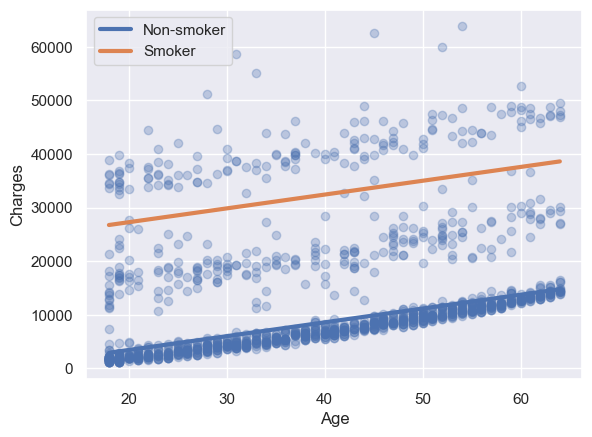

In [132]:

sex_mean = data['sex'].mean()
bmi_mean = data['bmi'].mean()
children_mean = data['children'].mean()
smoker_mean = data['smoker'].mean()

smoker_value = data['smoker']

age_sorted = np.sort(data['age'])

for smoker_value, label in [(0, "Non-smoker"), (1, "Smoker")]:
    yhat = (
        reg.intercept_
        + reg.coef_[0] * age_sorted
        + reg.coef_[1] * sex_mean
        + reg.coef_[2] * bmi_mean
        + reg.coef_[3] * children_mean
        + reg.coef_[4] * smoker_value
    )
    plt.plot(age_sorted, yhat, lw=3, label=label)

plt.scatter(data['age'], y, alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()



### Predictions

age = int(input("Enter your age: "))
sex = input("Enter your gender F/M: ")
bmi = input("Enter your bmi: ")
children = input("Children? Yes/No: ")
smoke = input("Smoke? Yes/No ")


